## Baixar Bibliotecas

In [34]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Diretório para o Dataset

In [35]:
test_dir = r'C:\Users\Marcus Eduardo\Downloads\2° Período - UEA\Linguagem de Programação II\Projeto_LP2\Testes 3\libras\asl_alphabet_test'
train_dir = r'C:\Users\Marcus Eduardo\Downloads\2° Período - UEA\Linguagem de Programação II\Projeto_LP2\Testes 3\libras\asl_alphabet_train'

## Algumas definições Importantes

In [36]:
im_shape = (50,50)
seed = 10
BATCH_SIZE = 16

## Preprocessamento das Imagens

In [37]:
# Subdivisão em trai e validação
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

## Data Generator

In [38]:
# If you want data augmentation, uncomment and run this cell
#data_generator = ImageDataGenerator(
       # validation_split=0.2,
        #rotation_range=20,
       # width_shift_range=0.2,
       # height_shift_range=0.2,
       # rescale=1./255,
       # shear_range=0.2,
       # zoom_range=0.2,
       # horizontal_flip=True,
      #  fill_mode='nearest')

#val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)






In [39]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(train_dir, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(train_dir, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(test_dir, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)



Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 29 images belonging to 29 classes.
Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


## Vizualição de Algumas Imagens

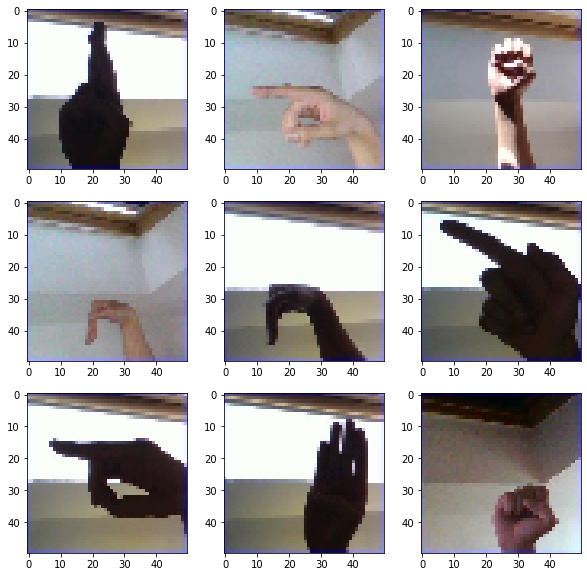

In [40]:
# Visualizing some examples
plt.figure(figsize=(10,10))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## Simples Modelo de CNN

In [41]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 20)        560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 40)        7240      
_________________________________________________________________
flatten (Flatten)            (None, 19360)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1936100   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                2

In [42]:
epochs = 80

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=15,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/80
4350/4350 [==============================] - ETA: 0s - loss: 0.9338 - accuracy: 0.7078
Epoch 00001: val_loss improved from inf to 1.15877, saving model to model.h5
4350/4350 [==============================] - 303s 70ms/step - loss: 0.9338 - accuracy: 0.7078 - val_loss: 1.1588 - val_accuracy: 0.6566
Epoch 2/80
4350/4350 [==============================] - ETA: 0s - loss: 0.2091 - accuracy: 0.9287
Epoch 00002: val_loss did not improve from 1.15877
4350/4350 [==============================] - 303s 70ms/step - loss: 0.2091 - accuracy: 0.9287 - val_loss: 1.2632 - val_accuracy: 0.6852
Epoch 3/80
4349/4350 [============================>.] - ETA: 0s - loss: 0.1220 - accuracy: 0.9593
Epoch 00003: val_loss did not improve from 1.15877
4350/4350 [==============================] - 306s 70ms/step - loss: 0.1220 - accuracy: 0.9593 - val_loss: 1.3006 - val_accuracy: 0.6872
Epoch 4/80
4350/4350 [==============================] - ETA: 0s - loss: 0.0890 - accuracy: 0.9703
Epoch 00004: val_loss

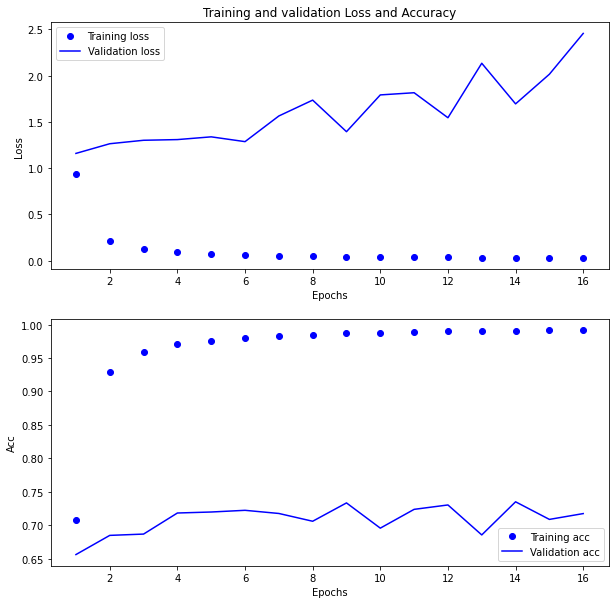

In [43]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [44]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
Val loss: 2.4532723426818848
Val accuracy: 0.7178735733032227


In [45]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.7541386771190446e-07
Test accuracy: 1.0


In [46]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Instructions for updating:
Please use Model.predict, which supports generators.
Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           J       1.00      1.00      1.00         1
           K       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         1
           M       1.00      1.00      1.00         1
           N       1.00      1.00      1.00         1
           O       1.00      1.00      1.00         1
           P       1.00      1.00

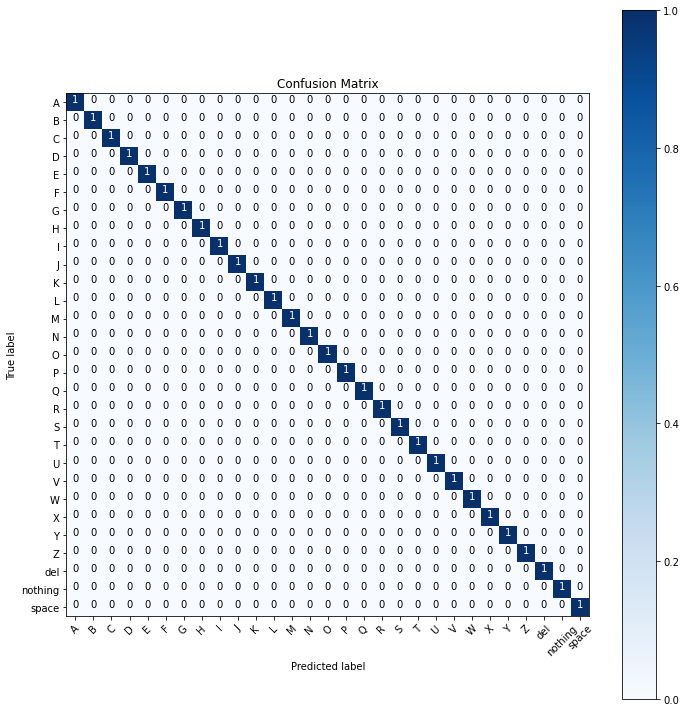

In [47]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))